In [1]:
# Data of housing prices in Dublin from 2010 - 2020 sourced from Smart Dublin, Dublinked Open Data Store(https://data.smartdublin.ie/dataset/dublin-residential-property-price-register).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean

In [3]:
house_2020_data = pd.read_csv(r'C:\Users\Craig Dowling\Downloads\ppr-2020.csv', encoding= 'unicode_escape')
house_2020 = pd.DataFrame(house_2020_data)
house_2020.head()

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,02/01/2020,"109 Cedar Walk, Castleoaks, Dublin Road",NaN,Carlow,211410.0,No,Yes,New Dwelling house /Apartment,NaN
1,06/01/2020,"34 FR BYRNE PARK, GRAIGUECULLEN, CARLOW",NaN,Carlow,150000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
2,07/01/2020,"98 Cluain Bui, Quinagh",NaN,Carlow,182379.0,No,Yes,New Dwelling house /Apartment,NaN
3,08/01/2020,"24 FRIARS GREEN, TULLOW RD, CARLOW",NaN,Carlow,180000.0,Yes,No,Second-Hand Dwelling house /Apartment,NaN
4,08/01/2020,"DOONANE, CRETTYARD, CARLOW",NaN,Carlow,95000.0,No,No,Second-Hand Dwelling house /Apartment,NaN


In [4]:
properties = house_2020.groupby("Description of Property")["Address"].count()
property_type = pd.DataFrame(properties)
property_type_sorted = property_type.sort_values("Address", ascending=False)
property_type_sorted

,Address
Description of Property,
Second-Hand Dwelling house /Apartment,39921
New Dwelling house /Apartment,9410
Teach/Árasán Cónaithe Atháimhe,2


In [5]:
house_types_2020 = house_2020.groupby(["County", "Description of Property"]).agg({'Price':['mean', 'min', 'max']})
house_types_2020

Price             \
                                                          mean        min   
County    Description of Property                                           
Carlow    New Dwelling house /Apartment          431420.448542   60000.00   
          Second-Hand Dwelling house /Apartment  186034.771163   10000.00   
Cavan     New Dwelling house /Apartment          180673.841282   30000.00   
          Second-Hand Dwelling house /Apartment  159458.940514    6664.81   
Clare     New Dwelling house /Apartment          305470.385545   20000.00   
          Second-Hand Dwelling house /Apartment  177295.336280   10000.00   
Cork      New Dwelling house /Apartment          326344.096513   16666.66   
          Second-Hand Dwelling house /Apartment  253717.899816    5666.67   
Donegal   New Dwelling house /Apartment          198747.933950   35000.00   
          Second-Hand Dwelling house /Apartment  136465.913402    9915.00   
Dublin    New Dwelling house /Apartment          678604.672707   10000.00   
          Second-Hand Dwelling house /Apartment  491318.007301    6500.00   
Galway    New Dwelling house /Apartment          343997.267129   50000.00   
          Second-Hand Dwelling house /Apartment  230334.805166    6666.50   
Kerry     New Dwelling house /Apartment          407259.688173   55770.00   
          Second-Hand Dwelling house /Apartment  186727.936601    7000.00   
Kildare   New Dwelling house /Apartment          354180.275901   20000.00   
          Second-Hand Dwelling house /Apartment  287428.693214   10000.00   
Kilkenny  New Dwelling house /Apartment          361031.374921   46000.00   
          Second-Hand Dwelling house /Apartment  208021.782853   10000.00   
Laois     New Dwelling house /Apartment          277695.839692   18650.00   
          Second-Hand Dwelling house /Apartment  184022.680422   15000.00   
Leitrim   New Dwelling house /Apartment          142467.775000   45000.00   
          Second-Hand Dwelling house /Apartment  122634.396040   10000.00   
Limerick  New Dwelling house /Apartment          331816.595907   40000.00   
          Second-Hand Dwelling house /Apartment  193434.057433    6348.60   
Longford  New Dwelling house /Apartment          556428.812000  100000.00   
          Second-Hand Dwelling house /Apartment  116947.353421   10000.00   
Louth     New Dwelling house /Apartment          273984.372174   20000.00   
          Second-Hand Dwelling house /Apartment  207511.015617   18000.00   
Mayo      New Dwelling house /Apartment          186377.671417   10000.00   
          Second-Hand Dwelling house /Apartment  140554.729082    5555.00   
Meath     New Dwelling house /Apartment          322661.872090   75000.00   
          Second-Hand Dwelling house /Apartment  262672.808648   10000.00   
          Teach/Árasán Cónaithe Atháimhe         307500.000000  307500.00   
Monaghan  New Dwelling house /Apartment          340832.543103   27259.00   
          Second-Hand Dwelling house /Apartment  142602.204142   10000.00   
Offaly    New Dwelling house /Apartment          215299.122500   30000.00   
          Second-Hand Dwelling house /Apartment  162931.835722   15000.00   
Roscommon New Dwelling house /Apartment          158843.160870   22026.43   
          Second-Hand Dwelling house /Apartment  118200.915586    5252.00   
Sligo     New Dwelling house /Apartment          127550.034000   66079.30   
          Second-Hand Dwelling house /Apartment  147856.063649   10000.00   
Tipperary New Dwelling house /Apartment          210569.990000   20000.00   
          Second-Hand Dwelling house /Apartment  152863.727479    9000.00   
Waterford New Dwelling house /Apartment          240054.749778   10000.00   
          Second-Hand Dwelling house /Apartment  190842.171620   13045.00   
Westmeath New Dwelling house /Apartment          254018.915053   30000.00   
          Second-Hand Dwelling house /Apartment  192043.076682   10062.35   
Wexford   New Dwelling house /Apartment          2407

In [6]:
houses_per_county = house_2020.groupby("County")["Address"].count()
df_houses_per_county = pd.DataFrame(houses_per_county)
df_APC = df_houses_per_county.sort_values("Address", ascending=False)
DF_APC = df_APC.reset_index()
DF_APC.rename(columns = {'Address':'Listings Sold'}, inplace = True)
DF_APC


,County,Listings Sold
0,Dublin,14723
1,Cork,5478
2,Kildare,2837
3,Galway,2361
4,Meath,2300
5,Limerick,1874
6,Wexford,1839
7,Wicklow,1734
8,Tipperary,1416
9,Waterford,1398


<AxesSubplot:xlabel='Listings Sold', ylabel='County'>

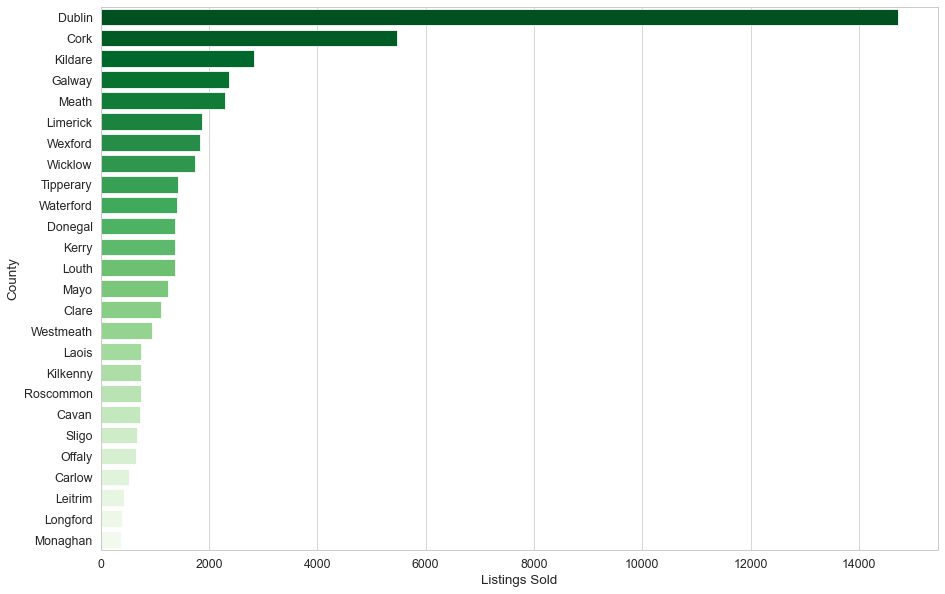

In [7]:
sns.set(rc={'figure.figsize':(15,10)})
sns.color_palette("bright")
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.4)

sns.barplot(y="County", x="Listings Sold", data=DF_APC, palette="Greens_r", saturation=1, ci=90)


([<matplotlib.patches.Wedge at 0x258f8c515b0>,
 [Text(0.8284360471893994, 1.128580398428576, 'Dublin'),
  Text(-0.7900619305467013, 1.0323769398339055, 'Cork'),
  Text(-1.1107673970798393, 0.4540878654891353, 'Kildare'),
  Text(-1.1481284955450899, 0.0655816873629251, 'Galway'),
  Text(-1.0928192833674377, -0.2671535399358952, 'Meath'),
  Text(-0.9623903700085025, -0.5327333063690479, 'Limerick'),
  Text(-0.8108190333256319, -0.7433522013130035, 'Wexford'),
  Text(-0.6222388875030067, -0.9070935822058387, 'Wicklow'),
  Text(-0.42901996685801014, -1.0128878852257797, 'Tipperary'),
  Text(-0.24161098274947204, -1.0731375182216092, 'Waterford'),
  Text(-0.04940331269649232, -1.0988900366709187, 'Donegal'),
  Text(0.1421173189971861, -1.0907807605752184, 'Kerry'),
  Text(0.32851992389970053, -1.0497974374139685, 'Louth'),
  Text(0.4973006334768287, -0.9811687316377061, 'Mayo'),
  Text(0.6376285022807274, -0.8963425087985265, 'Clare'),
  Text(0.748834076546084, -0.8057589750064058, 'Westmea

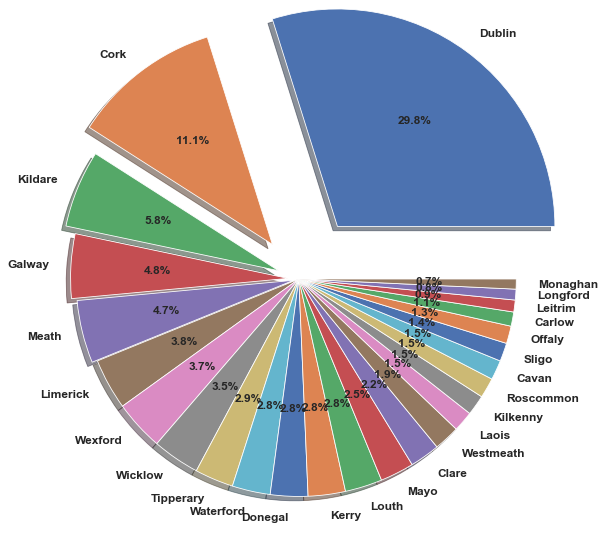

In [8]:
plt.figure(figsize=(15, 10))
explode = (0.3, 0.2, 0.1, 0.05, 0.025, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0) 
plt.pie(DF_APC["Listings Sold"], labels=DF_APC["County"], autopct="%.1f%%", explode=explode, shadow=True, textprops={'fontweight' : 'bold', 'fontsize' : 12})

In [9]:
average_price_per_county = house_2020.groupby("County")["Price"].mean()
df_average_price_per_county = pd.DataFrame(average_price_per_county)
df_APPC = df_average_price_per_county.sort_values("Price", ascending=False)
DF_APPC = df_APPC.reset_index()
DF_APPC

,County,Price
0,Dublin,530981.107399
1,Wicklow,364154.913737
2,Kildare,313545.808752
3,Meath,284653.512391
4,Cork,269574.221694
5,Galway,249784.036269
6,Kilkenny,220995.678277
7,Louth,220981.387430
8,Limerick,214184.053863
9,Carlow,208642.280787


<AxesSubplot:xlabel='Price', ylabel='County'>

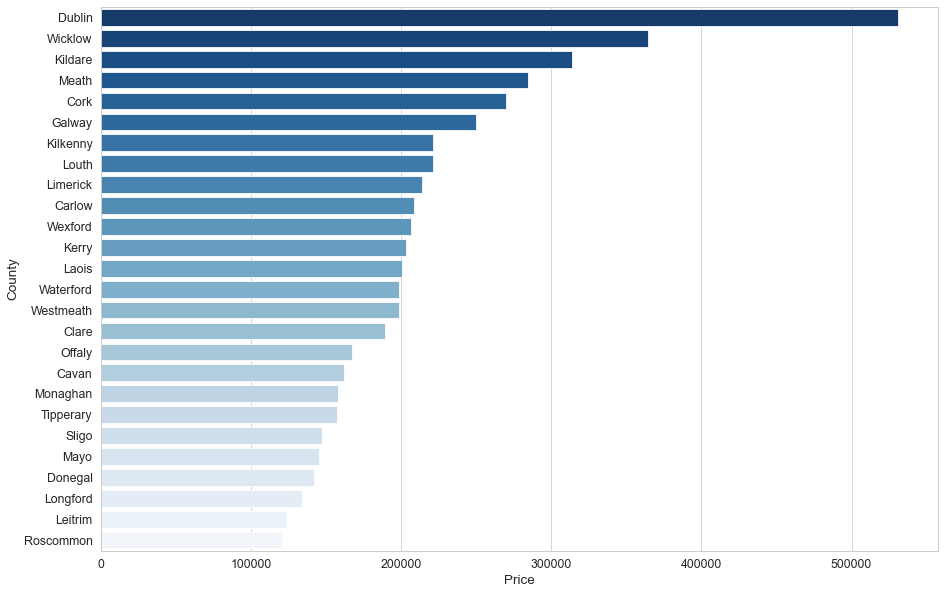

In [10]:
sns.barplot(y="County", x="Price", data=DF_APPC, palette="Blues_r")

In [11]:
listings_sold_county = DF_APC.merge(DF_APPC, on="County")
listings_sold_county

,County,Listings Sold,Price
0,Dublin,14723,530981.107399
1,Cork,5478,269574.221694
2,Kildare,2837,313545.808752
3,Galway,2361,249784.036269
4,Meath,2300,284653.512391
5,Limerick,1874,214184.053863
6,Wexford,1839,206515.064415
7,Wicklow,1734,364154.913737
8,Tipperary,1416,157224.299576
9,Waterford,1398,198762.650937


In [12]:
#properties_grouped = house_2020.groupby("county")["Description of Property"].count()
#df_properties_grouped = pd.DataFrame(properties_grouped)
#df_properties_grouped

pt_house_type = pd.pivot_table(house_2020, index="County", columns=["Description of Property"], aggfunc='count')
Listing_sold_county = listings_sold_county.join(pt_house_type["Address"], on="County")
Listing_sold_county

,County,Listings Sold,Price,New Dwelling house /Apartment,Second-Hand Dwelling house /Apartment,Teach/Árasán Cónaithe Atháimhe
0,Dublin,14723,530981.107399,3118.0,11605.0,NaN
1,Cork,5478,269574.221694,1196.0,4282.0,NaN
2,Kildare,2837,313545.808752,1110.0,1727.0,NaN
3,Galway,2361,249784.036269,404.0,1957.0,NaN
4,Meath,2300,284653.512391,842.0,1457.0,1.0
5,Limerick,1874,214184.053863,281.0,1593.0,NaN
6,Wexford,1839,206515.064415,316.0,1522.0,1.0
7,Wicklow,1734,364154.913737,473.0,1261.0,NaN
8,Tipperary,1416,157224.299576,107.0,1309.0,NaN
9,Waterford,1398,198762.650937,225.0,1173.0,NaN


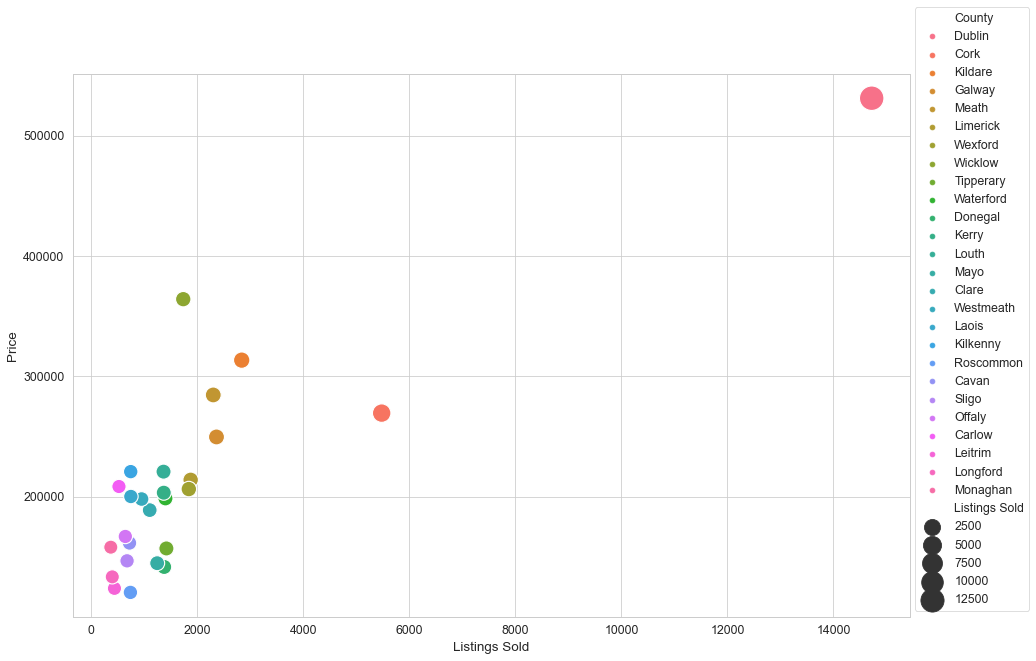

In [91]:
sp = sns.scatterplot(x="Listings Sold", y="Price", data=listings_sold_county, hue="County", size="Listings Sold", sizes = (200,600))
sp.legend(bbox_to_anchor=(1.15, 0), loc='lower right')
plt.show()

In [14]:
#Initial data set contained house sales in 2020 from all counties in Ireland. A new DataFrame was created below named, "house_2020_dublin", which is a subset of the "house_2020" DataFrame containing only house prices in Dublin.

In [15]:
house_2020_dublin = house_2020[house_2020['County']=='Dublin']
house_2020_dublin.head()

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
9194,02/01/2020,"12 WHITECLIFF, WHITECHURCH RD, RATHFARNHAM DUB...",Dublin 16,Dublin,565000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
9195,02/01/2020,"125 MILL TOWN HALL, MT ST ANNES, MILLTOWN",Dublin 6,Dublin,588500.00,No,No,Second-Hand Dwelling house /Apartment,NaN
9196,02/01/2020,"16 STRATFORD HAVEN, RATHGAR, DUBLIN 6",Dublin 6,Dublin,232500.00,No,No,Second-Hand Dwelling house /Apartment,NaN
9197,02/01/2020,"20 ST EITHNE ROAD, CABRA, DUBLIN 7",NaN,Dublin,360000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
9198,02/01/2020,"4 Belarmine View, Belarmine Woods, Stepaside",NaN,Dublin,555066.07,No,Yes,New Dwelling house /Apartment,NaN


In [16]:
#The remaining datasets were downloaded locally from https://data.smartdublin.ie/dataset/dublin-residential-property-price-register and imported as csv files using Pandas. Pandas DataFrames were then created for each year from 2010 - 2019 and the first 5 rows of the data printed to ensure each DataFrame consisted of the same structure.

In [17]:
def get_df_from_csv(csv_path):
    raw_path = f'{csv_path}'
    #print(raw_path)
    csv_data =  pd.read_csv(raw_path, encoding='unicode_escape')
    return pd.DataFrame(csv_data)

house_2019_dublin = get_df_from_csv(r'C:\Users\Craig Dowling\Downloads\ppr-2019-dublin.csv')
house_2019_dublin.head()

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,01/01/2019,"2 LEIX RD, CABRA, DUBLIN 7",Dublin 7,Dublin,30000.0,Yes,No,Second-Hand Dwelling house /Apartment,NaN
1,01/01/2019,"2 WOODALE VIEW, BALLYCULLEN, FIRHOUSE DUBLIN 24",Dublin 24,Dublin,30000.0,Yes,No,Second-Hand Dwelling house /Apartment,NaN
2,01/01/2019,"APT 50, EARLSFIELD COURT, FRANCIS ST DUBLIN 8",Dublin 8,Dublin,15000.0,Yes,No,Second-Hand Dwelling house /Apartment,NaN
3,02/01/2019,"3 Somerton Copse, Lucan",NaN,Dublin,290750.0,No,Yes,New Dwelling house /Apartment,NaN
4,02/01/2019,"31 ALL SAINTS PARK, RAHENY, DUBLIN 5",Dublin 5,Dublin,460000.0,No,No,Second-Hand Dwelling house /Apartment,NaN


In [18]:
house_2018_dublin = get_df_from_csv(r'C:\Users\Craig Dowling\Downloads\ppr-2018-dublin.csv')
house_2018_dublin.head()

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,02/01/2018,"1 ABBEY ST, HOWTH, DUBLIN",Dublin 7,Dublin,710000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
1,02/01/2018,"1 ROSEVILLE, LOWER ROAD, SHANKILL",Dublin 18,Dublin,627230.70,No,No,Second-Hand Dwelling house /Apartment,NaN
2,02/01/2018,"19 ULVERTON RD, DALKEY, DUBLIN",NaN,Dublin,1130000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
3,02/01/2018,"236 PHIBSBORO RD, DUBLIN 7, DUBLIN",Dublin 7,Dublin,277000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
4,02/01/2018,"3 COLLEGE COURT, PORTRANE ROAD, DONABATE",NaN,Dublin,348017.62,No,No,Second-Hand Dwelling house /Apartment,NaN


In [19]:
house_2017_dublin = get_df_from_csv(r'C:\Users\Craig Dowling\Downloads\ppr-2017-dublin.csv')
house_2017_dublin.head()

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,01/01/2017,"1 PINTAIL HOUSE, REDCOURT OAKS, SEAFIELD RD EAST",Dublin 3,Dublin,242424.0,Yes,No,Second-Hand Dwelling house /Apartment,NaN
1,01/01/2017,"11 PINTAIL HOUSE, REDCOURT OAKS, SEAFIELD RD EAST",Dublin 3,Dublin,242424.0,Yes,No,Second-Hand Dwelling house /Apartment,NaN
2,01/01/2017,"124 SEAFIELD RD, CLONTARF, DUBLIN 3",Dublin 3,Dublin,535500.0,Yes,No,Second-Hand Dwelling house /Apartment,NaN
3,01/01/2017,"126 SEAFIELD RD, CLONTARF, DUBLIN 3",Dublin 3,Dublin,630000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
4,01/01/2017,"128 SEAFIELD RD, CLONTARF, DUBLIN 3",Dublin 3,Dublin,535500.0,Yes,No,Second-Hand Dwelling house /Apartment,NaN


In [20]:
house_2016_dublin = get_df_from_csv(r'C:\Users\Craig Dowling\Downloads\ppr-2016-dublin.csv')
house_2016_dublin.head()

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,01/01/2016,"34 MOUNT PLEASANT TERRACE, RANELAGH, DUBLIN 6",Dublin 15,Dublin,170000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
1,04/01/2016,"13 Drury Mills, Saggart",NaN,Dublin,230088.0,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
2,04/01/2016,"19 Drury Mills, Saggart",NaN,Dublin,321586.0,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
3,04/01/2016,"2 BRIGHTON SQ, BRIGHTON RD, FOXROCK DUBLIN 18",Dublin 18,Dublin,1150000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
4,04/01/2016,"2 MOYOLA MEWS, LOWER CHURCHTOWN ROAD, DUBLIN 14",NaN,Dublin,330000.0,No,No,Second-Hand Dwelling house /Apartment,NaN


In [21]:
house_2015_dublin = get_df_from_csv(r'C:\Users\Craig Dowling\Downloads\ppr-2015-dublin.csv')
house_2015_dublin.head()

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,02/01/2015,"108 THE HARDWICKE VILLAGE, NORTH BRUNSWICK ST,...",Dublin 7,Dublin,138000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
1,02/01/2015,"12 THE CEDARS, MONKSTOWN VALLEY, MONKSTOWN",NaN,Dublin,270000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
2,02/01/2015,"4 SHREWSBURY, BALLSBRIDGE, DUBLIN 4",Dublin 4,Dublin,900000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
3,03/01/2015,"46 HOLYWELL, UPR KILMACUD RD, DUBLIN 14",Dublin 14,Dublin,592000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
4,05/01/2015,"12 VILLA PARK AVE, NAVAN RD, DUBLIN 7",Dublin 7,Dublin,510000.0,No,No,Second-Hand Dwelling house /Apartment,NaN


In [22]:
house_2014_dublin = get_df_from_csv(r'C:\Users\Craig Dowling\Downloads\ppr-2014-dublin.csv')
house_2014_dublin.head()

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,02/01/2014,"28 CHERRYFIELD RD, WALKINSTOWN, DUBLIN 12",NaN,Dublin,95000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
1,02/01/2014,"32 KILCROSS SQ, SANDYFORD, DUBLIN 18",NaN,Dublin,170000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
2,02/01/2014,"70 EDENMORE AVENUE, RAHENY, DUBLIN 5",NaN,Dublin,141000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
3,02/01/2014,"76 CABRA DR, PHIBSBOROUGH, DUBLIN 7",NaN,Dublin,155000.0,Yes,No,Second-Hand Dwelling house /Apartment,NaN
4,03/01/2014,"18 ALBERT COLLEGE CRESCENT, GLASNEVIN, DUBLIN 9",NaN,Dublin,257500.0,No,No,Second-Hand Dwelling house /Apartment,NaN


In [23]:
house_2013_dublin = get_df_from_csv(r'C:\Users\Craig Dowling\Downloads\ppr-2013-dublin.csv')
house_2013_dublin.head()

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,02/01/2013,"11 Whites Gate, White's Road, Castleknock",NaN,Dublin,700352.42,No,Yes,New Dwelling house /Apartment,greater than 125 sq metres
1,02/01/2013,"13 Crosforge, Saggart, Co Dublin",NaN,Dublin,180616.74,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
2,02/01/2013,"2 Barnwell Terrace, Hansfield, Dublin 15",NaN,Dublin,147974.00,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
3,02/01/2013,"3 Stocking Wood Green, Stocking Avenue, Rathfa...",NaN,Dublin,280000.00,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
4,02/01/2013,"56 Bargy Road, East Wall",Dublin 3,Dublin,160000.00,No,No,Second-Hand Dwelling house /Apartment,NaN


In [24]:
house_2012_dublin = get_df_from_csv(r'C:\Users\Craig Dowling\Downloads\ppr-2012-dublin.csv')
house_2012_dublin.head()

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,01/01/2012,"78 Dollymount Park, Clontarf, Dublin 3",Dublin 3,Dublin,169525.0,Yes,No,Second-Hand Dwelling house /Apartment,NaN
1,02/01/2012,"Apartment 24, Fortfield Court, Terenure",Dublin 6w,Dublin,120000.0,Yes,No,Second-Hand Dwelling house /Apartment,NaN
2,03/01/2012,"12 Brookwood Crescent, Artane, Dublin 5",Dublin 5,Dublin,90000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
3,03/01/2012,"182 Santry Close, Santry",NaN,Dublin,360000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
4,03/01/2012,"31 Glencairn Lawn, the gallops, sandyford",NaN,Dublin,255000.0,No,No,Second-Hand Dwelling house /Apartment,NaN


In [25]:
house_2011_dublin = get_df_from_csv(r'C:\Users\Craig Dowling\Downloads\ppr-2011-dublin.csv')
house_2011_dublin.head()

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,01/01/2011,"251 Clontarf Road, Clontarf",Dublin 3,Dublin,108532.0,Yes,No,Second-Hand Dwelling house /Apartment,NaN
1,04/01/2011,"22 St. Patrick's Park, Clondalkin",NaN,Dublin,360000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
2,04/01/2011,"46 Longmeadows, Islandbridge",Dublin 8,Dublin,254000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
3,04/01/2011,"60 WOODSIDE, RATHFARNHAM, DUBLIN 14",Dublin 14,Dublin,445000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
4,04/01/2011,"9 Shandon Crescent, Phibsboro, Dublin 7",NaN,Dublin,220000.0,Yes,No,Second-Hand Dwelling house /Apartment,NaN


In [26]:
house_2010_dublin = get_df_from_csv(r'C:\Users\Craig Dowling\Downloads\ppr-2010-dublin.csv')
house_2010_dublin.head()

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,01/01/2010,"5 Braemor Drive, Churchtown, Co.Dublin",NaN,Dublin,343000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
1,04/01/2010,"1 Meadow Avenue, Dundrum, Dublin 14",NaN,Dublin,438500.0,No,No,Second-Hand Dwelling house /Apartment,NaN
2,04/01/2010,"12 Sallymount Avenue, Ranelagh",NaN,Dublin,425000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
3,04/01/2010,"206 Philipsburgh Avenue, Marino, Dublin 3",NaN,Dublin,430000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
4,04/01/2010,"22 Laverna Way, Castleknock, Dublin 15",NaN,Dublin,355000.0,No,No,Second-Hand Dwelling house /Apartment,NaN


In [27]:
# The next step was to join these tables vertically into one file called, "house_2010_2020_dublin". As each of the columns directly align, the pandas concatenation function was used.

In [28]:
house_2010_2020_dublin = pd.concat([house_2020_dublin, house_2019_dublin, house_2018_dublin, house_2017_dublin, house_2016_dublin, house_2015_dublin, house_2014_dublin, house_2013_dublin, house_2012_dublin, house_2011_dublin, house_2010_dublin])
house_2010_2020_dublin.describe

<bound method NDFrame.describe of      Date of Sale (dd/mm/yyyy)  \
9194                02/01/2020   
9195                02/01/2020   
9196                02/01/2020   
9197                02/01/2020   
9198                02/01/2020   
...                        ...   
6930                28/12/2010   
6931                28/12/2010   
6932                30/12/2010   
6933                30/12/2010   
6934                30/12/2010   

                                                Address Postal Code  County  \
9194  12 WHITECLIFF, WHITECHURCH RD, RATHFARNHAM DUB...   Dublin 16  Dublin   
9195          125 MILL TOWN HALL, MT ST ANNES, MILLTOWN    Dublin 6  Dublin   
9196              16 STRATFORD HAVEN, RATHGAR, DUBLIN 6    Dublin 6  Dublin   
9197                 20 ST EITHNE ROAD, CABRA, DUBLIN 7         NaN  Dublin   
9198       4 Belarmine View, Belarmine Woods, Stepaside         NaN  Dublin   
...                                                 ...         ...     ...   
6930

In [29]:
# We can now see that the data frames have successfully concatenated as indicated by "[138667 rows x 9 columns]". Our new datarfame now consists of 138,667 house sales in Dublin between 2010 and 2020.

In [30]:
# The next step was to expand the address column so that we can further analyse house sales in different areas in Dublin. https://datascienceparichay.com/article/pandas-split-column-by-delimiter/#:~:text=Split%20column%20by%20delimiter%20into,True%20to%20the%20expand%20parameter.

In [31]:
house_2010_2020_dublin.head()

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
9194,02/01/2020,"12 WHITECLIFF, WHITECHURCH RD, RATHFARNHAM DUB...",Dublin 16,Dublin,565000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
9195,02/01/2020,"125 MILL TOWN HALL, MT ST ANNES, MILLTOWN",Dublin 6,Dublin,588500.00,No,No,Second-Hand Dwelling house /Apartment,NaN
9196,02/01/2020,"16 STRATFORD HAVEN, RATHGAR, DUBLIN 6",Dublin 6,Dublin,232500.00,No,No,Second-Hand Dwelling house /Apartment,NaN
9197,02/01/2020,"20 ST EITHNE ROAD, CABRA, DUBLIN 7",NaN,Dublin,360000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
9198,02/01/2020,"4 Belarmine View, Belarmine Woods, Stepaside",NaN,Dublin,555066.07,No,Yes,New Dwelling house /Apartment,NaN


In [32]:
#Resetting the index to clean up the data
dublin_house_prices = house_2010_2020_dublin.reset_index()

In [33]:
# Brief analysis of house prices over the past 10 years to shape understanding of pricing landscape.

In [34]:
dublin_house_prices['Price'].mean()

402533.12654683524

In [35]:
dublin_house_prices['Price'].describe()

count    1.386670e+05
mean     4.025331e+05
std      1.366046e+06
min      5.250000e+03
25%      2.065000e+05
50%      2.951542e+05
75%      4.300000e+05
max      1.823789e+08
Name: Price, dtype: float64

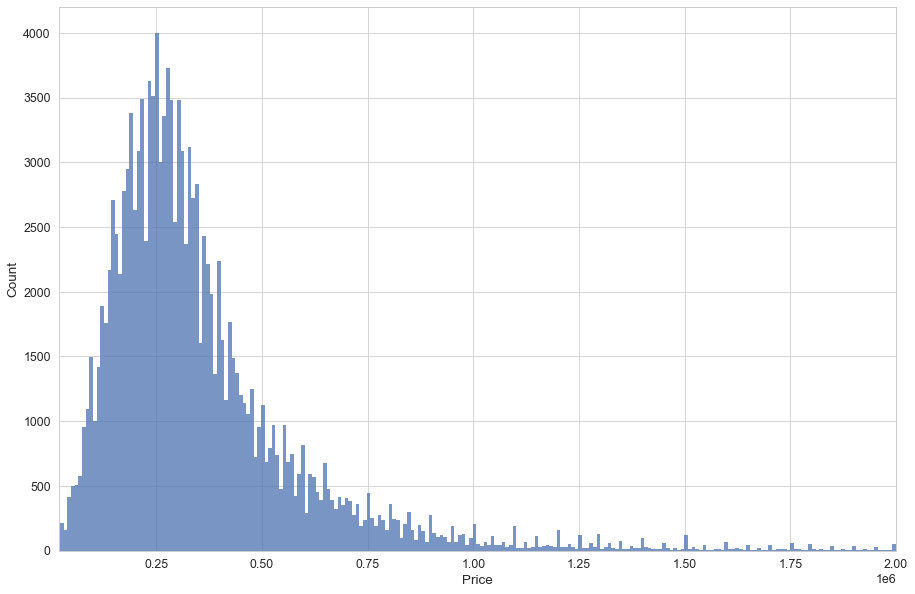

In [36]:
price_hist = sns.histplot(x='Price', data=dublin_house_prices)
price_hist.set(xlim=(20000, 2000000))
plt.show()

In [37]:
#Isolating the Address column so that it can be cleaned for more detailed on analysis of housing prices across different areas in Dublin.

In [38]:
address = dublin_house_prices[['Address']]
address

,Address
0,"12 WHITECLIFF, WHITECHURCH RD, RATHFARNHAM DUB..."
1,"125 MILL TOWN HALL, MT ST ANNES, MILLTOWN"
2,"16 STRATFORD HAVEN, RATHGAR, DUBLIN 6"
3,"20 ST EITHNE ROAD, CABRA, DUBLIN 7"
4,"4 Belarmine View, Belarmine Woods, Stepaside"
...,...
138662,"89 Castledawson, Sion Hill Rock Road, Blackrock"
138663,"Apartment 2 The Orchard, 645 South Circular Ro..."
138664,"2 Merville Avenue, Stillorgan, County Dublin"
138665,"44 St. Johns Park West, Clondalkin, Dublin 22"


In [39]:
house_dublin_splitaddress = dublin_house_prices['Address'].str.split(',', expand=True)
house_dublin_splitaddress

,0,1,2
0,12 WHITECLIFF,WHITECHURCH RD,RATHFARNHAM DUBLIN 16
1,125 MILL TOWN HALL,MT ST ANNES,MILLTOWN
2,16 STRATFORD HAVEN,RATHGAR,DUBLIN 6
3,20 ST EITHNE ROAD,CABRA,DUBLIN 7
4,4 Belarmine View,Belarmine Woods,Stepaside
...,...,...,...
138662,89 Castledawson,Sion Hill Rock Road,Blackrock
138663,Apartment 2 The Orchard,645 South Circular Road,Dublin 8
138664,2 Merville Avenue,Stillorgan,County Dublin
138665,44 St. Johns Park West,Clondalkin,Dublin 22


In [40]:
# As we can see, the 'split' address is still messy and cannot be used to group data as we would like. Using a geopy module we will attempt to run each address through a free API to extract a full address.

In [41]:
#pip install geopy

In [42]:
#from geopy.geocoders import Nominatim
#geolocator = Nominatim(user_agent="cgjd136@gmail.com")


In [43]:
# We creat three new blank columns in the address dataframe where we would like the latitude,Longitude and location address to be entered.

In [44]:
#address['location_lat'] = ""
#address['location_long'] = ""
#address['location_address'] = ""
#address.head()

In [45]:
dublin_house_prices['Postal Code'].isna().sum()

58339

In [46]:
dict_dublin_dist = {'dublin 1':['abbey street', 'amiens street', 'capel street', 'dorset street', 'henry street', 'mountjoy square', 'marlboro street', 'north wall', 'oconnell street', 'parnell square', 'summerhill', 'talbot street'], 'dublin 2': ['baggot street lower', 'college green', 'dawson street', 'fitzwilliam square', 'harcourt street', 'kildare st', 'lord edward street', 'merrion square', 'mount street', 'nassau street', 'pearse street', 'st stephens green', 'georges street', 'leeson street'], 'dublin 3':['ballybough', 'clonliffe', 'clontarf', 'dollymount', 'east wall', 'fairview', 'marino'], 'dublin 4':['ballsbridge', 'booterstown', 'blackrock', 'donnybrook', 'irishtown', 'merrion', 'pembrook', 'ringsend', 'sandymount', 'baggot street upper'], 'dublin 5':['artane', 'harmonstown', 'raheny'], 'dublin 6': ['dartry', 'ranelagh', 'rathmines', 'rathgar', 'sandyford', 'domvilles', 'wellington', 'rossmores', 'glendowns', 'kimmage', 'wainsfort', 'harolds cross', 'terenure'], 'dublin 7':['arbour hill', 'cabra', 'phibsboro', 'four courts', 'grange gorman'], 'dublin 8':['dolphins barn', 'inchicore', 'island bridge', 'kilmainham', 'merchants quay', 'portobello', 'south circular road', 'the coombe'], 'dublin 9':['beaumont', 'drumcondra', 'elm mount', 'griffith avenue', 'santry', 'whitehall'], 'dublin 10':'ballyfermot', 'dublin 11':['ballygall', 'cappagh', 'cremore', 'dubber', 'finglas', 'jamestown', 'kilshane', 'wadelai'], 'dublin 12':['bluebell', 'crumlin', 'drimnagh', 'walkinstown'], 'dublin 13':['baily', 'baldoyle', 'bayside', 'donaghmede', 'sutton', 'howth'], 'dublin 14':['churchtown', 'dundrum', 'goatstown', 'roebuck', 'windy arbour', 'clonskeagh'], 'dublin 15':['blanchardstown', 'castleknock', 'clonee', 'clonsilla', 'corduff', 'mulhuddart'], 'dublin 16':['ballinteer', 'kilmashogue', 'knocklyon', 'rockbrook', 'whitechurch'], 'dublin 17':['belcamp', 'balgriffin', 'clonshaugh', 'priorswood', 'darndale', 'riverside'], 'dublin 18':['cabinteely', 'carrickmines', 'deansgrange', 'foxrock', 'kilternan', 'sandyford', 'ticknock', 'ballyedmonduff', 'stepaside', 'leopardstown'], 'dublin 20':['chapelizod', 'palmerstown'], 'dublin 22':['bawnogue', 'clondalkin', 'neilstown'], 'dublin 24':['firhouse', 'jobstown', 'kilnamanagh', 'oldbawn', 'tallaght']}
dict_dublin_dist['dublin 18']

['cabinteely',
 'carrickmines',
 'deansgrange',
 'foxrock',
 'kilternan',
 'sandyford',
 'ticknock',
 'ballyedmonduff',
 'stepaside',
 'leopardstown']

In [47]:
dublin_dist = pd.read_csv(r"C:\Users\Craig Dowling\OneDrive\Documents\UCD Professional Academy\Project\dublin district.csv", encoding= 'unicode_escape')
df_dublin_dist = pd.DataFrame(dublin_dist)
df_dublin_dist.head(10)

,Post Code,Town
0,Dublin 1,abbey street
1,Dublin 1,amiens street
2,Dublin 1,capel street
3,Dublin 1,dorset street
4,Dublin 1,henry street
5,Dublin 1,mountjoy
6,Dublin 1,marlboro street
7,Dublin 1,north wall
8,Dublin 1,oconnell street
9,Dublin 1,parnell square


In [48]:
towns_set_a = set()
for i in df_dublin_dist["Town"]:
    if type(i) != float:
        towns_set_a.add(i.lower())

print(towns_set_a)



{'nassau street', 'domvilles', 'finglas', 'glenageary', 'kilbarrack', 'griffith ave', 'dollymount', 'ballinteer', 'ifsc', 'sandycove', 'mount merrion', 'clonskeagh', 'dun laoghaire', 'city west', 'kimmage', 'blanchardstown', 'clonshaugh', 'ongar', 'santry', 'marlboro street', 'east wall', 'ringsend', 'sutton', 'stepaside', 'stoneybatter', 'kinsealy', 'saggart', 'wainsfort', 'foxrock', 'donnycarney', 'neilstown', 'ballsbridge', 'parnell square', 'lucan', 'kiltipper', 'abbey street', 'killiney', 'balbriggan', 'donnybrook', 'garristown', 'goatstown', 'college green', 'clonliffe', 'churchtown', 'chapelizod', 'greenhills', 'talbot street', 'ticknock', 'baggot street lower', 'milltown', 'sandymount', 'marino', 'stillorgan', 'rathgar', 'belcamp', 'cremore', 'darndale', 'portobello', 'rush', 'old conna', 'ballyedmonduff', 'oldcourt', 'dorset street', 'cappagh', 'bray', 'meakstown', 'kilmainham', 'mountjoy', 'hollystown', 'wadelai', 'ballyfermot', 'coolmine', 'tallaght', 'harcourt street', 'fir

In [49]:
for i in range(138667):
    a = dublin_house_prices['Address'][i].lower()
    for t in towns_set_a:
        if t in a:
            dublin_house_prices.at[i, 'Town'] = t

dublin_house_prices.head()

,index,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Town
0,9194,02/01/2020,"12 WHITECLIFF, WHITECHURCH RD, RATHFARNHAM DUB...",Dublin 16,Dublin,565000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,rathfarnham
1,9195,02/01/2020,"125 MILL TOWN HALL, MT ST ANNES, MILLTOWN",Dublin 6,Dublin,588500.00,No,No,Second-Hand Dwelling house /Apartment,NaN,milltown
2,9196,02/01/2020,"16 STRATFORD HAVEN, RATHGAR, DUBLIN 6",Dublin 6,Dublin,232500.00,No,No,Second-Hand Dwelling house /Apartment,NaN,rathgar
3,9197,02/01/2020,"20 ST EITHNE ROAD, CABRA, DUBLIN 7",NaN,Dublin,360000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,cabra
4,9198,02/01/2020,"4 Belarmine View, Belarmine Woods, Stepaside",NaN,Dublin,555066.07,No,Yes,New Dwelling house /Apartment,NaN,stepaside


In [50]:
print("Number of NaN values in Postal Code column: " + str(dublin_house_prices['Postal Code'].isna().sum()))
print("Number of NaN values in Town column: " + str(dublin_house_prices['Town'].isna().sum()))

Number of NaN values in Postal Code column: 58339
Number of NaN values in Town column: 26232


In [51]:
import re

for i in range(len(dublin_house_prices)):
#for i in range(6):
    if type(dublin_house_prices.at[i, "Postal Code"]) == float:
        a = dublin_house_prices['Address'][i].lower()

        result = re.search('dublin ([0-9]{1,2})', a)
        if result is not None:
            dublin_house_prices.at[i, 'Postal Code'] = "Dublin`" + str(result.groups()[0])

dublin_house_prices.head(10)

,index,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Town
0,9194,02/01/2020,"12 WHITECLIFF, WHITECHURCH RD, RATHFARNHAM DUB...",Dublin 16,Dublin,565000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,rathfarnham
1,9195,02/01/2020,"125 MILL TOWN HALL, MT ST ANNES, MILLTOWN",Dublin 6,Dublin,588500.00,No,No,Second-Hand Dwelling house /Apartment,NaN,milltown
2,9196,02/01/2020,"16 STRATFORD HAVEN, RATHGAR, DUBLIN 6",Dublin 6,Dublin,232500.00,No,No,Second-Hand Dwelling house /Apartment,NaN,rathgar
3,9197,02/01/2020,"20 ST EITHNE ROAD, CABRA, DUBLIN 7",Dublin`7,Dublin,360000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,cabra
4,9198,02/01/2020,"4 Belarmine View, Belarmine Woods, Stepaside",NaN,Dublin,555066.07,No,Yes,New Dwelling house /Apartment,NaN,stepaside
5,9199,02/01/2020,"41 Fairhaven Avenue, Castleknock Road, Castlek...",NaN,Dublin,660000.00,No,Yes,New Dwelling house /Apartment,NaN,castleknock
6,9200,02/01/2020,"5 WILLIAM BECKETT HOUSE, PEMBROKE ROW, DUBLIN",Dublin 2,Dublin,624600.00,No,No,Second-Hand Dwelling house /Apartment,NaN,pembroke
7,9201,02/01/2020,"7 HAYDENS PARK DR, LUCAN, DUBLIN",NaN,Dublin,478000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,lucan
8,9202,02/01/2020,"7 MAPLEWOOD RD, SPRINGFIELD, TALLAGHT DUBLIN 24",Dublin 24,Dublin,208000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,tallaght
9,9203,02/01/2020,"APARTMENT 311, SWIFTWOOD DEVELOPMENT, SAGGART",NaN,Dublin,250000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,saggart


In [52]:
print("Number of NaN values in Postal Code column is now: " + str(dublin_house_prices['Postal Code'].isna().sum()))

Number of NaN values in Postal Code column is now: 47067


In [53]:
a = df_dublin_dist[df_dublin_dist.Town == "abbey street"]
col = a.columns[0]
print(a)
a = a.set_index("Town")
print(a.loc["abbey street", "Post Code"])


  Post Code          Town
0  Dublin 1  abbey street
Dublin 1


In [54]:
df_dublin_dist.head(10)

for i in range(len(dublin_house_prices)):
#for i in range(6):
        if type(dublin_house_prices.at[i, "Postal Code"]) == float: #If PC is not NaN
            dhp_town = dublin_house_prices.at[i, "Town"]
            if  type(dhp_town) != float: # if Town is not NaN
                
                # If the Town in both dataframes match, fill in the missing post code in the dhp df
                try:
                    matching_dist_row = df_dublin_dist[df_dublin_dist.Town ==  dhp_town]
                    matching_dist_row = matching_dist_row.set_index("Town")

                    #print(matching_dist_row)
                    #print(matching_dist_row["Post Code"])
                except Exception as e:
                    raise(e)
                    #continue
                
                dublin_house_prices.at[i, 'Postal Code'] = matching_dist_row.loc[dhp_town, "Post Code"]
dublin_house_prices.head(10)

,index,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Town
0,9194,02/01/2020,"12 WHITECLIFF, WHITECHURCH RD, RATHFARNHAM DUB...",Dublin 16,Dublin,565000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,rathfarnham
1,9195,02/01/2020,"125 MILL TOWN HALL, MT ST ANNES, MILLTOWN",Dublin 6,Dublin,588500.00,No,No,Second-Hand Dwelling house /Apartment,NaN,milltown
2,9196,02/01/2020,"16 STRATFORD HAVEN, RATHGAR, DUBLIN 6",Dublin 6,Dublin,232500.00,No,No,Second-Hand Dwelling house /Apartment,NaN,rathgar
3,9197,02/01/2020,"20 ST EITHNE ROAD, CABRA, DUBLIN 7",Dublin`7,Dublin,360000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,cabra
4,9198,02/01/2020,"4 Belarmine View, Belarmine Woods, Stepaside",Dublin 18,Dublin,555066.07,No,Yes,New Dwelling house /Apartment,NaN,stepaside
5,9199,02/01/2020,"41 Fairhaven Avenue, Castleknock Road, Castlek...",Dublin 15,Dublin,660000.00,No,Yes,New Dwelling house /Apartment,NaN,castleknock
6,9200,02/01/2020,"5 WILLIAM BECKETT HOUSE, PEMBROKE ROW, DUBLIN",Dublin 2,Dublin,624600.00,No,No,Second-Hand Dwelling house /Apartment,NaN,pembroke
7,9201,02/01/2020,"7 HAYDENS PARK DR, LUCAN, DUBLIN",Dublin 22,Dublin,478000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,lucan
8,9202,02/01/2020,"7 MAPLEWOOD RD, SPRINGFIELD, TALLAGHT DUBLIN 24",Dublin 24,Dublin,208000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,tallaght
9,9203,02/01/2020,"APARTMENT 311, SWIFTWOOD DEVELOPMENT, SAGGART",Dublin 24,Dublin,250000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,saggart


In [55]:
print("Number of NaN values in Postal Code column is now: " + str(dublin_house_prices['Postal Code'].isna().sum()))

Number of NaN values in Postal Code column is now: 5193


In [56]:
#% of NaN values in Postal Code column of Dublin_house_prices_sorted DataFrame
(dublin_house_prices["Postal Code"].isna().sum())/len(dublin_house_prices)*100

3.7449429208102867

In [57]:
dublin_house_prices_sorted = pd.read_csv(r"C:\Users\Craig Dowling\OneDrive\Documents\UCD Professional Academy\Project\dublin_house_prices.csv", encoding= 'unicode_escape')
dublin_house_prices_sorted.reset_index()
Dublin_house_prices_sorted = dublin_house_prices_sorted[["Date of Sale (dd/mm/yyyy)", "Address", "Postal Code", "County", "Price", "Description of Property", "Town"]]
Dublin_house_prices_sorted

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price,Description of Property,Town
0,02/01/2020,"12 WHITECLIFF, WHITECHURCH RD, RATHFARNHAM DUB...",Dublin 16,Dublin,565000.00,Second-Hand Dwelling house /Apartment,rathfarnham
1,02/01/2020,"125 MILL TOWN HALL, MT ST ANNES, MILLTOWN",Dublin 6,Dublin,588500.00,Second-Hand Dwelling house /Apartment,milltown
2,02/01/2020,"16 STRATFORD HAVEN, RATHGAR, DUBLIN 6",Dublin 6,Dublin,232500.00,Second-Hand Dwelling house /Apartment,rathgar
3,02/01/2020,"20 ST EITHNE ROAD, CABRA, DUBLIN 7",Dublin 7,Dublin,360000.00,Second-Hand Dwelling house /Apartment,cabra
4,02/01/2020,"4 Belarmine View, Belarmine Woods, Stepaside",Dublin 18,Dublin,555066.07,New Dwelling house /Apartment,stepaside
...,...,...,...,...,...,...,...
138662,28/12/2010,"89 Castledawson, Sion Hill Rock Road, Blackrock",Dublin 4,Dublin,510000.00,Second-Hand Dwelling house /Apartment,blackrock
138663,28/12/2010,"Apartment 2 The Orchard, 645 South Circular Ro...",Dublin 8,Dublin,185022.00,New Dwelling house /Apartment,south circular road
138664,30/12/2010,"2 Merville Avenue, Stillorgan, County Dublin",Dublin 4,Dublin,44440.83,Second-Hand Dwelling house /Apartment,stillorgan
138665,30/12/2010,"44 St. Johns Park West, Clondalkin, Dublin 22",Dublin 22,Dublin,225000.00,Second-Hand Dwelling house /Apartment,clondalkin


In [58]:
dhps = Dublin_house_prices_sorted.groupby("Postal Code")["Price"].mean()
house_price_per_district = pd.DataFrame(dhps).sort_values("Price", ascending=False)
house_price_per_district_i = house_price_per_district.reset_index()

<AxesSubplot:xlabel='Price', ylabel='Postal Code'>

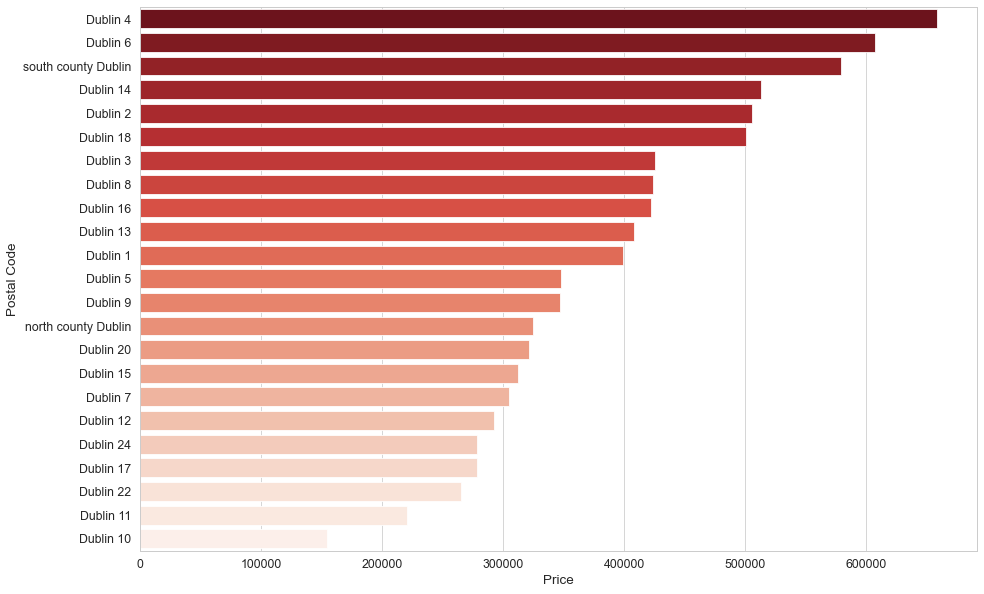

In [59]:
sns.barplot(y="Postal Code", x="Price", data=house_price_per_district_i, palette="Reds_r")

In [60]:
DHP = Dublin_house_prices_sorted.groupby("Postal Code").agg({'Price':['mean', 'min', 'max']})
house_price_per_district_extended = pd.DataFrame(DHP)
house_price_per_district_extended

Price                        
                              mean       min           max
Postal Code                                               
Dublin 1             398572.773372   7300.00  1.342610e+08
Dublin 10            154531.781188   8400.00  8.425000e+05
Dublin 11            220539.781328   6250.00  3.529177e+07
Dublin 12            292349.187294   6000.00  2.021652e+07
Dublin 13            407877.615280  10000.00  5.211384e+07
Dublin 14            512517.727521   5500.00  4.203672e+07
Dublin 15            312331.007726   7000.00  2.643172e+07
Dublin 16            422318.462303   6500.00  1.040000e+07
Dublin 17            278031.583076   9521.96  3.960700e+07
Dublin 18            500397.390808   5500.00  9.976297e+07
Dublin 2             505764.719478   7000.00  8.442080e+07
Dublin 20            321126.765321   5675.00  3.418855e+07
Dublin 22            264992.224317   7200.00  2.687333e+07
Dublin 24            278137.171541   8000.00  6.408506e+07
Dublin 3             425093.253974   5715.00  3.451514e+07
Dublin 4             658278.766035   5280.00  8.792818e+07
Dublin 5             348031.416652   5400.00  6.628145e+07
Dublin 6             606925.734943   5250.00  4.987500e+07
Dublin 7             305018.930397   5900.00  1.830000e+07
Dublin 8             423331.890243   5500.00  1.391650e+08
Dublin 9             346889.398798   6500.00  4.832400e+07
north county Dublin  324646.673397   6000.00  2.106230e+07
south county Dublin  578833.486760   6000.00  1.144408e+08

In [61]:
average_price_per_town = dublin_house_prices.groupby("Town")["Price"].mean()
df_appt = pd.DataFrame(average_price_per_town)
average_price_per_town_sorted = df_appt.sort_values("Price", ascending=False)
average_price_per_town_sorted.head()

,Price
Town,
dawson street,1.721593e+06
baily,1.537387e+06
fitzwilliam square,1.450714e+06
st stephens green,1.142365e+06
dartry,1.108008e+06


In [62]:
dublin_isna = dublin_house_prices[dublin_house_prices["Town"].isna()]
dublin_isna[1000:1100]

,index,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Town
4786,13980,20/05/2020,"16 DELVIN BANKS, THE NAUL, CO. DUBLIN",NaN,Dublin,335000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,NaN
4790,13984,20/05/2020,"26 SPRANGERS YARD, CROW ST, TEMPLEBAR DUBLIN 2",Dublin 2,Dublin,315000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,NaN
4808,14002,21/05/2020,"1 The Lane, Scholarstown Wood, Scholarstown Road",NaN,Dublin,563876.65,No,Yes,New Dwelling house /Apartment,NaN,NaN
4813,14007,21/05/2020,"126 HAMPTON COURT, HAMPTON SQ, NAVAN RD DUBLIN 7",Dublin 7,Dublin,309000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,NaN
4815,14009,21/05/2020,"132 SCARRIFF HOUSE, CUSTOM HOUSE SQ, MAYOR ST ...",Dublin 1,Dublin,310000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5264,14458,05/06/2020,"44 Ardsolus, Old Naas Road, Brownsbarn",NaN,Dublin,334801.00,No,Yes,New Dwelling house /Apartment,NaN,NaN
5274,14468,05/06/2020,"92 KINVARA PARK, NAVAN RD, DUBLIN 7",Dublin 7,Dublin,427000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,NaN
5278,14472,05/06/2020,"APT 180, THE RICHMOND, NORTH BRUNSWICK ST DUBL...",Dublin 7,Dublin,210000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,NaN
5280,14474,05/06/2020,"MULCAIRE, 40A AILESBURY RD, DUBLIN 4",Dublin 4,Dublin,3300000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,NaN


In [63]:
listings_per_town = dublin_house_prices.groupby("Town")["Address"].count()
df_lpt = pd.DataFrame(listings_per_town)
listings_per_town_sorted = df_lpt.sort_values("Address", ascending=False)
listings_per_town_sorted.head(90)

,Address
Town,
swords,4389
lucan,4009
castleknock,3222
tallaght,3100
rathfarnham,3047
...,...
firhouse,413
east wall,410
killester,396


In [64]:
price_v_listings = average_price_per_town_sorted.join(listings_per_town_sorted)
price_v_listings.head(60)

,Price,Address
Town,,
dawson street,1.721593e+06,3
baily,1.537387e+06,29
fitzwilliam square,1.450714e+06,7
st stephens green,1.142365e+06,11
dartry,1.108008e+06,165
merrion square,9.666777e+05,9
ballsbridge,9.164599e+05,1046
brennanstown,8.816215e+05,27
dalkey,8.757697e+05,826


In [65]:
# The aim of the below code is to create a loop which will itterate over each address in the 'Address' column of the 'addresses' dataframe and to populate the latitude, longitude and location address into our blank columns; 'location_lat', 'location_long', 'location_address'. The second block of code using the 'except' code is to account for where errors may occur which will impact our code from running. Where an error occurs, the aim is to populate a blank cell.

In [66]:
#for i in address.index:
   # try:
        
 #       location = geolocator.geocode(address['Address'][i])
        
        
  #      address.loc[i,'location_lat'] = location.latitude
   #     address.loc[i,'location_long'] = location.longitude
    #    address.loc[i,'location_address'] = location.address
    #except:
        
     #   address.loc[i,'location_lat'] = ""
      #  address.loc[i,'location_long'] = ""
       # address.loc[i,'location_address'] = ""
#address.head()

In [67]:
df_income = pd.read_csv(r"C:\Users\Craig Dowling\Downloads\CIA02.20220401T080438.csv", encoding= 'unicode_escape')
DF_income = pd.DataFrame(df_income)
DF_income.head()

,"ï»¿""Statistic""",Year,County and Region,UNIT,VALUE
0,Compensation of Employees (i.e. Wages and Sala...,2000,State,Euro Million,42023.0
1,Compensation of Employees (i.e. Wages and Sala...,2000,Northern and Western,Euro Million,5749.0
2,Compensation of Employees (i.e. Wages and Sala...,2000,Border,Euro Million,2542.0
3,Compensation of Employees (i.e. Wages and Sala...,2000,Leitrim,Euro Million,203.0
4,Compensation of Employees (i.e. Wages and Sala...,2000,Sligo,Euro Million,512.0


In [68]:
DF_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11100 entries, 0 to 11099
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ï»¿"Statistic"     11100 non-null  object 
 1   Year               11100 non-null  int64  
 2   County and Region  11100 non-null  object 
 3   UNIT               11100 non-null  object 
 4   VALUE              11100 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 433.7+ KB


In [69]:
DF_income.groupby('ï»¿"Statistic"')["VALUE"].count()

ï»¿"Statistic"
Compensation of Employees (i.e. Wages and Salaries, Benefits in kind, Employers' social insurance contribution)      740
Current Taxes on Income                                                                                              740
Disposable Household Income                                                                                          740
Disposable Income per Person                                                                                         740
Disposable Income per Person (excluding Rent)                                                                        740
Income of Self Employed                                                                                              740
Index of Disposable Income per Person                                                                                740
Index of Disposable Income per Person (excluding Rent)                                                               740
Index of Total In

In [70]:
Income_pp = DF_income['ï»¿"Statistic"'] == "Total Income per Person"
Income_PP = DF_income[Income_pp]
Income_PP

,"ï»¿""Statistic""",Year,County and Region,UNIT,VALUE
5180,Total Income per Person,2000,State,Euro,17833.0
5181,Total Income per Person,2000,Northern and Western,Euro,15167.0
5182,Total Income per Person,2000,Border,Euro,14397.0
5183,Total Income per Person,2000,Leitrim,Euro,14880.0
5184,Total Income per Person,2000,Sligo,Euro,15018.0
...,...,...,...,...,...
5915,Total Income per Person,2019,Midland,Euro,23203.0
5916,Total Income per Person,2019,Laois,Euro,23163.0
5917,Total Income per Person,2019,Longford,Euro,22127.0
5918,Total Income per Person,2019,Offaly,Euro,22749.0


In [71]:
rent = DF_income['ï»¿"Statistic"'] == "Rent of dwellings (including imputed rent of owner-occupied dwellings)"
Rent = DF_income[rent]
Rent

,"ï»¿""Statistic""",Year,County and Region,UNIT,VALUE
1480,Rent of dwellings (including imputed rent of o...,2000,State,Euro Million,3598.0
1481,Rent of dwellings (including imputed rent of o...,2000,Northern and Western,Euro Million,514.0
1482,Rent of dwellings (including imputed rent of o...,2000,Border,Euro Million,203.0
1483,Rent of dwellings (including imputed rent of o...,2000,Leitrim,Euro Million,18.0
1484,Rent of dwellings (including imputed rent of o...,2000,Sligo,Euro Million,44.0
...,...,...,...,...,...
2215,Rent of dwellings (including imputed rent of o...,2019,Midland,Euro Million,520.0
2216,Rent of dwellings (including imputed rent of o...,2019,Laois,Euro Million,151.0
2217,Rent of dwellings (including imputed rent of o...,2019,Longford,Euro Million,62.0
2218,Rent of dwellings (including imputed rent of o...,2019,Offaly,Euro Million,138.0


In [72]:
type(Income_PP[["Year"]])

pandas.core.frame.DataFrame

In [73]:
Income_pp_Dublin = Income_PP['County and Region']=="Dublin"
Income_PP_Dublin = Income_PP[Income_pp_Dublin]
Income_pp_Dublin_10_19 = Income_PP_Dublin['Year'] > 2009
Income_PP_Dublin_10_19 = Income_PP_Dublin[Income_pp_Dublin_10_19]
Income_PP_Dublin_10_19

,"ï»¿""Statistic""",Year,County and Region,UNIT,VALUE
5576,Total Income per Person,2010,Dublin,Euro,29225.0
5613,Total Income per Person,2011,Dublin,Euro,29388.0
5650,Total Income per Person,2012,Dublin,Euro,30841.0
5687,Total Income per Person,2013,Dublin,Euro,30844.0
5724,Total Income per Person,2014,Dublin,Euro,31590.0
5761,Total Income per Person,2015,Dublin,Euro,32998.0
5798,Total Income per Person,2016,Dublin,Euro,34144.0
5835,Total Income per Person,2017,Dublin,Euro,35777.0
5872,Total Income per Person,2018,Dublin,Euro,37406.0
5909,Total Income per Person,2019,Dublin,Euro,38903.0


In [74]:
rent_Dublin = Rent['County and Region']=="Dublin"
rent_Dublin = Rent[rent_Dublin]
rent_Dublin_10_19 = rent_Dublin['Year'] > 2009
rent_Dublin_10_19 = rent_Dublin[rent_Dublin_10_19]
rent_Dublin_10_19

,"ï»¿""Statistic""",Year,County and Region,UNIT,VALUE
1876,Rent of dwellings (including imputed rent of o...,2010,Dublin,Euro Million,2550.0
1913,Rent of dwellings (including imputed rent of o...,2011,Dublin,Euro Million,2740.0
1950,Rent of dwellings (including imputed rent of o...,2012,Dublin,Euro Million,2861.0
1987,Rent of dwellings (including imputed rent of o...,2013,Dublin,Euro Million,2558.0
2024,Rent of dwellings (including imputed rent of o...,2014,Dublin,Euro Million,2710.0
2061,Rent of dwellings (including imputed rent of o...,2015,Dublin,Euro Million,3140.0
2098,Rent of dwellings (including imputed rent of o...,2016,Dublin,Euro Million,3752.0
2135,Rent of dwellings (including imputed rent of o...,2017,Dublin,Euro Million,3973.0
2172,Rent of dwellings (including imputed rent of o...,2018,Dublin,Euro Million,4569.0
2209,Rent of dwellings (including imputed rent of o...,2019,Dublin,Euro Million,5132.0


<AxesSubplot:xlabel='Year', ylabel='VALUE'>

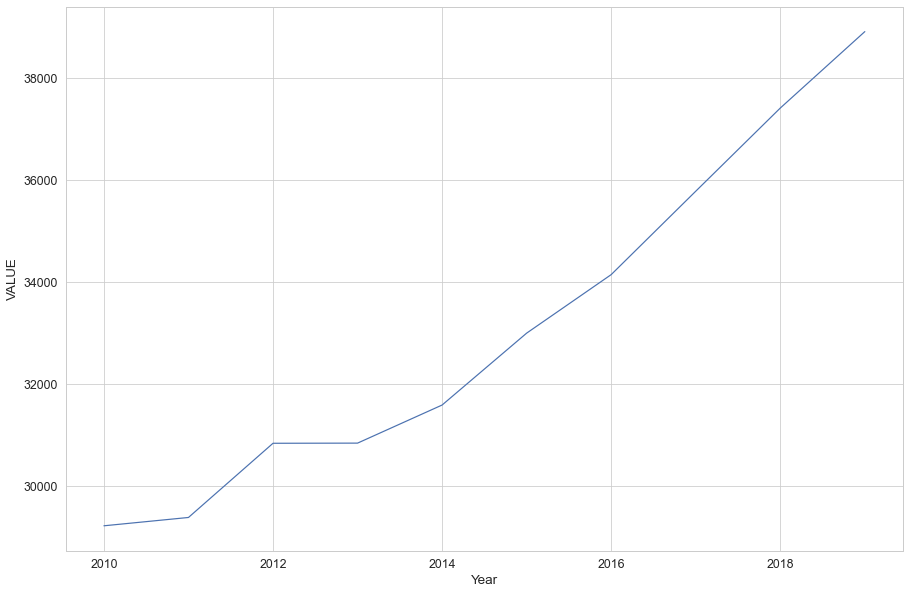

In [75]:
sns.lineplot(x=Income_PP_Dublin_10_19["Year"], y=Income_PP_Dublin_10_19["VALUE"])

In [76]:
#Parsing date as time/series format and setting as index
dublin_house_prices["Date of Sale"]=pd.to_datetime(dublin_house_prices["Date of Sale (dd/mm/yyyy)"], dayfirst=True)
dublin_house_prices.set_index("Date of Sale", inplace=True)
dublin_house_prices.head()

,index,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Town
Date of Sale,,,,,,,,,,,
2020-01-02,9194,02/01/2020,"12 WHITECLIFF, WHITECHURCH RD, RATHFARNHAM DUB...",Dublin 16,Dublin,565000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,rathfarnham
2020-01-02,9195,02/01/2020,"125 MILL TOWN HALL, MT ST ANNES, MILLTOWN",Dublin 6,Dublin,588500.00,No,No,Second-Hand Dwelling house /Apartment,NaN,milltown
2020-01-02,9196,02/01/2020,"16 STRATFORD HAVEN, RATHGAR, DUBLIN 6",Dublin 6,Dublin,232500.00,No,No,Second-Hand Dwelling house /Apartment,NaN,rathgar
2020-01-02,9197,02/01/2020,"20 ST EITHNE ROAD, CABRA, DUBLIN 7",Dublin`7,Dublin,360000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,cabra
2020-01-02,9198,02/01/2020,"4 Belarmine View, Belarmine Woods, Stepaside",Dublin 18,Dublin,555066.07,No,Yes,New Dwelling house /Apartment,NaN,stepaside


In [77]:
#Resetting index to create "Date of Sale" column.
df1 = dublin_house_prices.reset_index()

#Creating a "Year" column in our new dataframe, "df1".
df1 ['Year'] = df1['Date of Sale'].dt.year

#Creating a new series, "DF1", which groups average house price per year in Dublin.
DF1 = df1.groupby('Year')['Price'].mean()

#Creating a dataframe from series, "DF1", and resetting the index.
Average_Price_Per_Year_dublin = pd.DataFrame(DF1)
Average_Price_Per_Year_Dublin = Average_Price_Per_Year_dublin.reset_index()
Average_Price_Per_Year_Dublin

,Year,Price
0,2010,333028.360568
1,2011,309263.164387
2,2012,280516.142434
3,2013,326729.194227
4,2014,362162.853388
5,2015,351037.784917
6,2016,405135.701306
7,2017,419643.139455
8,2018,469313.896159
9,2019,482560.659557


<AxesSubplot:xlabel='Year', ylabel='Price'>

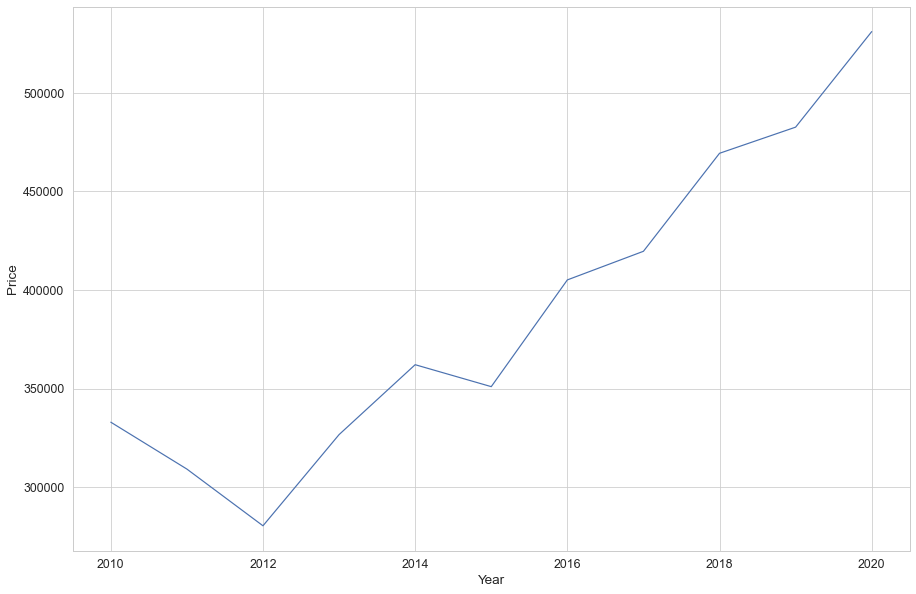

In [78]:
#Plotting the average price per house in Dublin from 2010 - 2019.
sns.lineplot(x=Average_Price_Per_Year_Dublin["Year"], y=Average_Price_Per_Year_Dublin["Price"])

In [79]:
house_price_v_income = Average_Price_Per_Year_Dublin.merge(Income_PP_Dublin_10_19, on='Year')
house_price_v_rent_v_income = house_price_v_income.merge(rent_Dublin_10_19, on="Year")
house_price_v_rent_v_income

,Year,Price,"ï»¿""Statistic""_x",County and Region_x,UNIT_x,VALUE_x,"ï»¿""Statistic""_y",County and Region_y,UNIT_y,VALUE_y
0,2010,333028.360568,Total Income per Person,Dublin,Euro,29225.0,Rent of dwellings (including imputed rent of o...,Dublin,Euro Million,2550.0
1,2011,309263.164387,Total Income per Person,Dublin,Euro,29388.0,Rent of dwellings (including imputed rent of o...,Dublin,Euro Million,2740.0
2,2012,280516.142434,Total Income per Person,Dublin,Euro,30841.0,Rent of dwellings (including imputed rent of o...,Dublin,Euro Million,2861.0
3,2013,326729.194227,Total Income per Person,Dublin,Euro,30844.0,Rent of dwellings (including imputed rent of o...,Dublin,Euro Million,2558.0
4,2014,362162.853388,Total Income per Person,Dublin,Euro,31590.0,Rent of dwellings (including imputed rent of o...,Dublin,Euro Million,2710.0
5,2015,351037.784917,Total Income per Person,Dublin,Euro,32998.0,Rent of dwellings (including imputed rent of o...,Dublin,Euro Million,3140.0
6,2016,405135.701306,Total Income per Person,Dublin,Euro,34144.0,Rent of dwellings (including imputed rent of o...,Dublin,Euro Million,3752.0
7,2017,419643.139455,Total Income per Person,Dublin,Euro,35777.0,Rent of dwellings (including imputed rent of o...,Dublin,Euro Million,3973.0
8,2018,469313.896159,Total Income per Person,Dublin,Euro,37406.0,Rent of dwellings (including imputed rent of o...,Dublin,Euro Million,4569.0
9,2019,482560.659557,Total Income per Person,Dublin,Euro,38903.0,Rent of dwellings (including imputed rent of o...,Dublin,Euro Million,5132.0


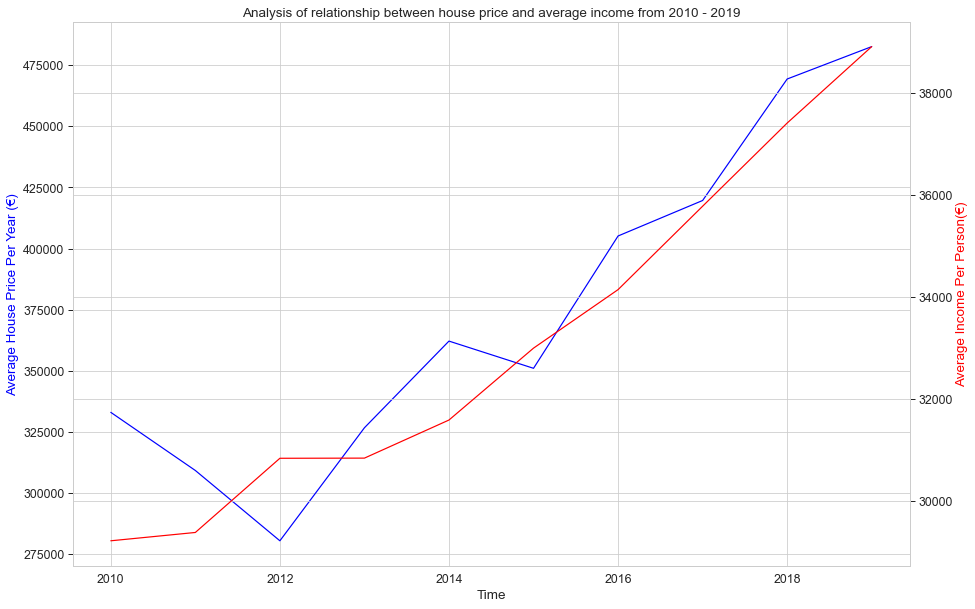

In [80]:
fig, ax = plt.subplots()
ax.plot(house_price_v_income["Year"], house_price_v_income["Price"], color='blue')
ax.set_xlabel('Time')
ax.set_ylabel('Average House Price Per Year (€)', color='blue')
ax.set_title('Analysis of relationship between house price and average income from 2010 - 2019')
ax2 = ax.twinx()
ax2.plot(house_price_v_income["Year"], house_price_v_income["VALUE"], color='red')
ax2.set_ylabel('Average Income Per Person(€)', color = 'red')
plt.show()

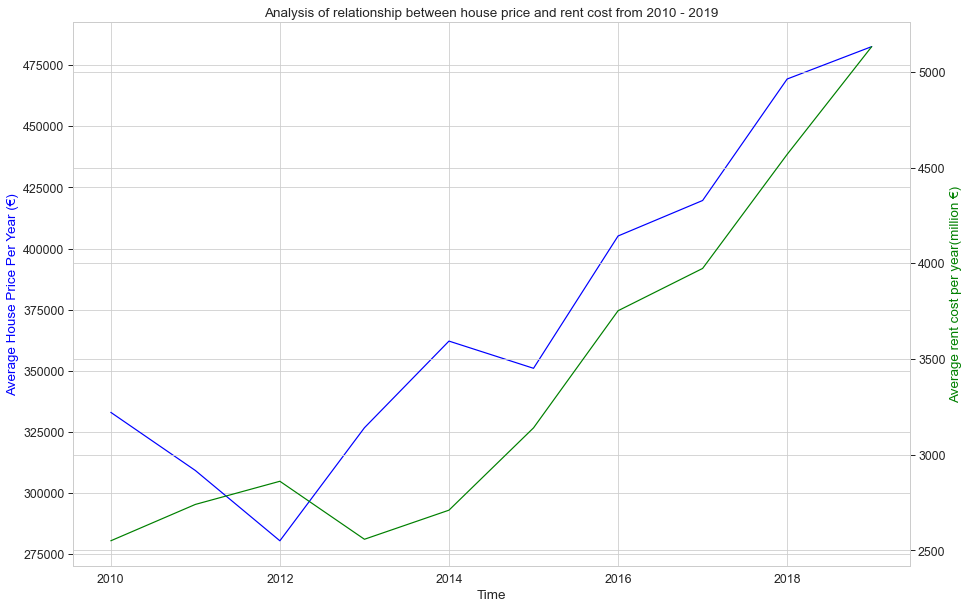

In [81]:
fig, ax = plt.subplots()
ax.plot(house_price_v_rent_v_income["Year"], house_price_v_rent_v_income["Price"], color='blue')
ax.set_xlabel('Time')
ax.set_ylabel('Average House Price Per Year (€)', color='blue')
ax.set_title('Analysis of relationship between house price and rent cost from 2010 - 2019')
ax2 = ax.twinx()
ax2.plot(house_price_v_rent_v_income["Year"], house_price_v_rent_v_income["VALUE_y"], color='green')
ax2.set_ylabel('Average rent cost per year(million €)', color = 'green')
plt.show()

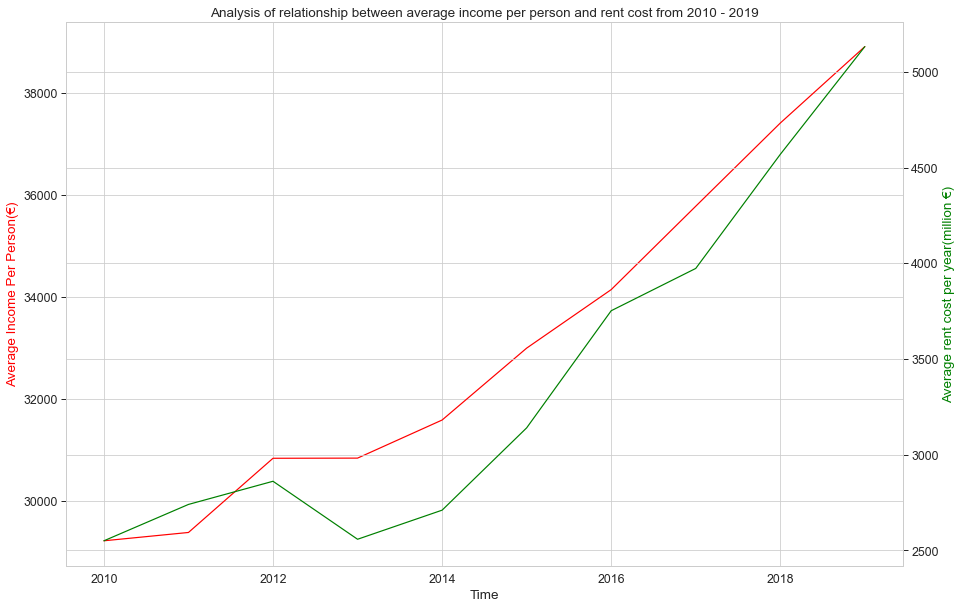

In [82]:
fig, ax = plt.subplots()
ax.plot(house_price_v_rent_v_income["Year"], house_price_v_rent_v_income["VALUE_x"], color='red')
ax.set_xlabel('Time')
ax.set_ylabel('Average Income Per Person(€)', color='red')
ax.set_title('Analysis of relationship between average income per person and rent cost from 2010 - 2019')
ax2 = ax.twinx()
ax2.plot(house_price_v_rent_v_income["Year"], house_price_v_rent_v_income["VALUE_y"], color='green')
ax2.set_ylabel('Average rent cost per year(million €)', color = 'green')
plt.show()

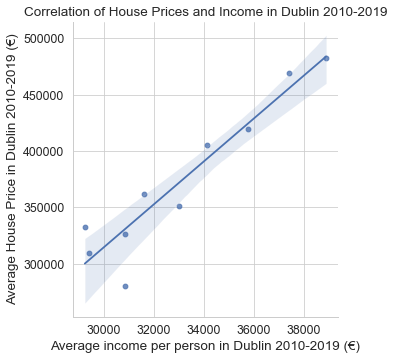

In [83]:
lmplot = sns.lmplot(data=house_price_v_income, x='VALUE', y='Price', ci=95)
lmplot.set(xlabel='Average income per person in Dublin 2010-2019 (€)', ylabel='Average House Price in Dublin 2010-2019 (€)', title="Correlation of House Prices and Income in Dublin 2010-2019")
plt.show()

In [84]:
house_price_v_income["Price"].corr(house_price_v_income["VALUE"])

0.9410491650747744

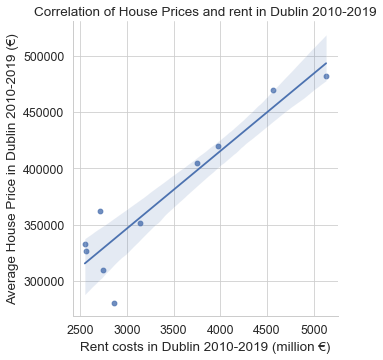

In [85]:
lmplot = sns.lmplot(data=house_price_v_rent_v_income, x='VALUE_y', y='Price', ci=95)
lmplot.set(xlabel='Rent costs in Dublin 2010-2019 (million €)', ylabel='Average House Price in Dublin 2010-2019 (€)', title="Correlation of House Prices and rent in Dublin 2010-2019")
plt.show()

In [86]:
house_price_v_rent_v_income["Price"].corr(house_price_v_rent_v_income["VALUE_y"])

0.9287912610603551

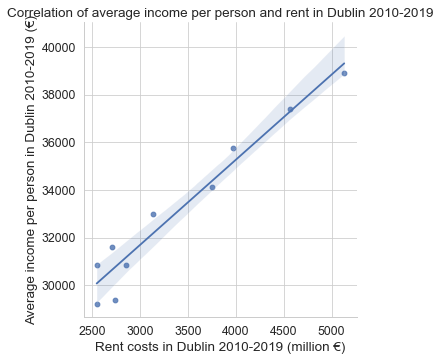

In [87]:
lmplot = sns.lmplot(data=house_price_v_rent_v_income, x='VALUE_y', y='VALUE_x', ci=95)
lmplot.set(xlabel='Rent costs in Dublin 2010-2019 (million €)', ylabel='Average income per person in Dublin 2010-2019 (€)', title="Correlation of average income per person and rent in Dublin 2010-2019")
plt.show()

In [88]:
house_price_v_rent_v_income["VALUE_x"].corr(house_price_v_rent_v_income["VALUE_y"])

0.9730365305895877

In [89]:
house_price_v_rent_v_income.corr()

,Year,Price,VALUE_x,VALUE_y
Year,1.000000,0.915668,0.978036,0.915643
Price,0.915668,1.000000,0.941049,0.928791
VALUE_x,0.978036,0.941049,1.000000,0.973037
VALUE_y,0.915643,0.928791,0.973037,1.000000


<AxesSubplot:>

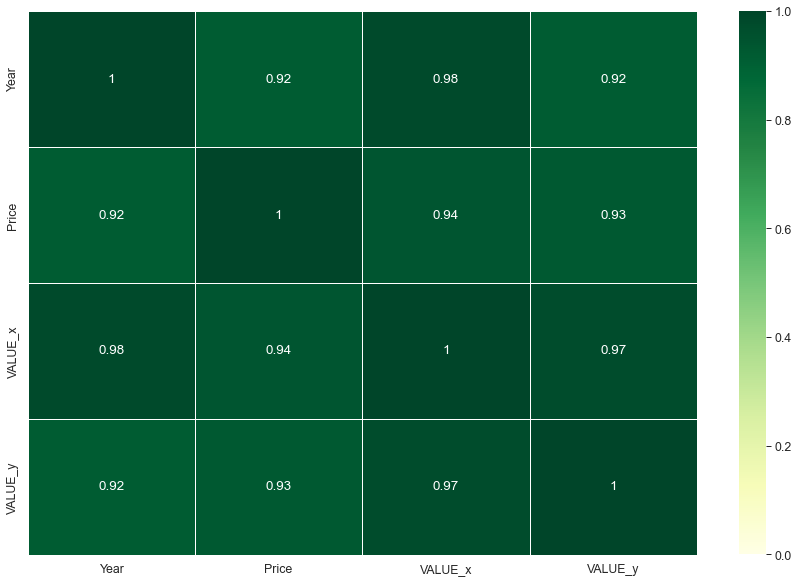

In [90]:
sns.heatmap(house_price_v_rent_v_income.corr(), cmap='YlGn', vmin=0, vmax=1, annot=True, linewidths=0.5)